In [1]:
import os 
os.chdir("..")

In [2]:
from src.modules.decomposition.pca import PCA
from sklearn.decomposition import PCA as PCA_skt
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784')


In [4]:
mnist["data"] = mnist["data"].to_numpy()

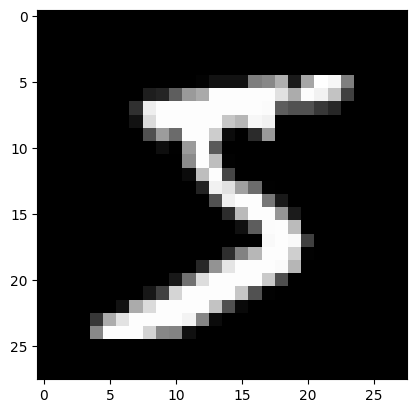

In [5]:
plt.gray()
plt.imshow(mnist["data"][0].reshape(28,28))
plt.show()

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
train_len = int(len(mnist.data) * 0.8)

In [8]:
train_digitis = dict()
test_digitis = dict()

for key, value in mnist.items():
    if key == "data" or key == "target" :
        print(key)
        train_digitis[key] = value[:train_len]
        test_digitis[key] = value[train_len:]

data
target


In [9]:
%%timeit 
PCA(train_digitis["data"], 10)

2.95 s ± 479 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
pca_skt = PCA_skt(n_components=10)

In [11]:
%%timeit 
pca_skt.fit_transform(train_digitis["data"])

1.6 s ± 817 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
reconst, principal_vals, principal_components, normalizer = PCA(train_digitis["data"], 10)

In [16]:
principal_vals 

array([333451.38269228, 243033.36349999, 211839.53295786, 184995.60449243,
       167167.97767045, 148273.34579467, 112256.31415124,  98881.92739627,
        94471.94444377,  81056.30565952])

In [18]:
pca_skt.explained_variance_

array([333457.33728759, 243037.70345897, 211843.31587422, 184998.90804436,
       167170.96286622, 148275.99358027, 112258.31876408,  98883.6931765 ,
        94473.6314729 ,  81057.7531194 ])

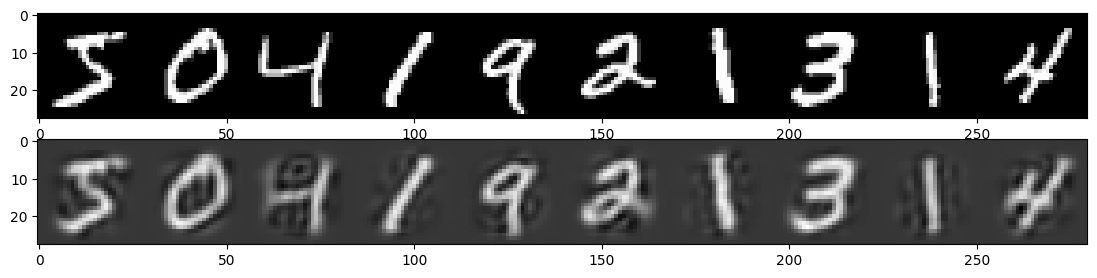

In [15]:
X = train_digitis["data"]
reconst, _, _, _ = PCA(X, num_components=60)
num_images_to_show = 10
reconst_images = np.reshape(reconst[:num_images_to_show], (-1, 28, 28))
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))
ax[0].imshow(np.concatenate(np.reshape(X[:num_images_to_show], (-1, 28, 28)), -1), cmap="gray")
ax[1].imshow(np.concatenate(reconst_images, -1), cmap="gray");

In [24]:
n_components = []
explained_variance = []
for n_component in range(1,200):
    pca_skt = PCA_skt(n_components=n_component)
    pca_skt.fit_transform(X)
    n_components.append(n_component)
    explained_variance.append(sum(pca_skt.explained_variance_ratio_))
    

explained_variance_ratio_ is the proportion of the variance of the dataset captured by each principal component. If sum all explaned variance ration have the all variance 


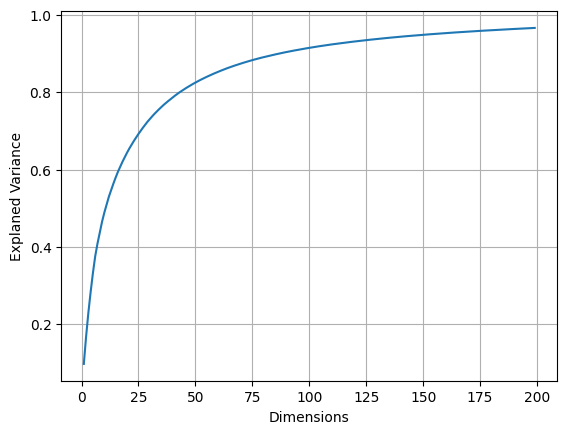

In [25]:
plt.plot(n_components,explained_variance)
plt.ylabel("Explaned Variance")
plt.xlabel("Dimensions")
plt.grid()
plt.show()

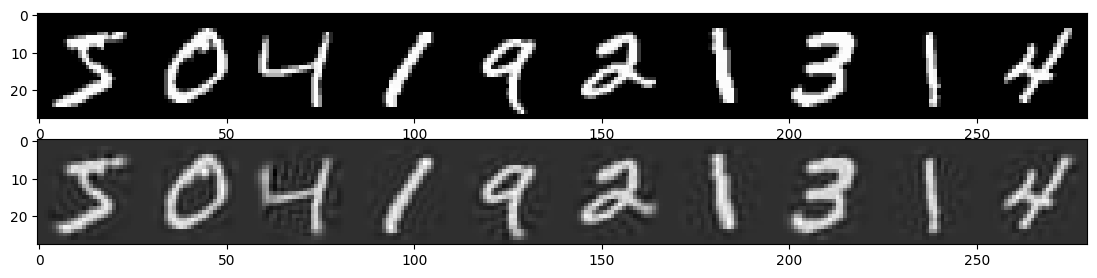

In [43]:
# in sklearn pca method can use the % value of variance you want is this sum of all variance components:
pca_skt = PCA_skt(n_components=0.95)
X_transformed = pca_skt.fit_transform(X)
reconst=pca_skt.inverse_transform(X_transformed)
num_images_to_show = 10
reconst_images = np.reshape(reconst[:num_images_to_show], (-1, 28, 28))
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))
ax[0].imshow(np.concatenate(np.reshape(X[:num_images_to_show], (-1, 28, 28)), -1), cmap="gray")
ax[1].imshow(np.concatenate(reconst_images, -1), cmap="gray");


In [46]:
X_transformed[0].shape

(154,)

In [48]:
reconst, principal_vals, principal_components, normalizer = PCA(X, 154)

In [52]:
principal_components.shape

(784, 154)

In [55]:
principal_vals

array([333451.38269228, 243033.36349999, 211839.53295786, 184995.60449243,
       167167.97767045, 148273.34579467, 112256.31415124,  98881.92739627,
        94471.94444377,  81056.30565952,  72182.16217705,  69407.9156163 ,
        58841.41713181,  57874.6108516 ,  54196.99233162,  51031.0022809 ,
        45384.99274586,  43749.36860897,  40651.26075106,  39487.89309621,
        36766.07887002,  34490.3412123 ,  32769.36070257,  31245.06610322,
        30259.66293992,  28759.06109445,  27886.58573805,  26989.20222082,
        25517.84836524,  23685.80403228,  22560.04798004,  22213.90021057,
        20676.57387649,  20074.51455274,  19554.03494891,  18633.10975015,
        17330.10171287,  16749.18790488,  16519.37136818,  16223.13672877,
        15679.61944456,  15195.84390886,  14315.20008868,  13611.56991196,
        13204.91688428,  12832.06365791,  12397.19748696,  12031.8676334 ,
        11698.55127362,  11058.47088009,  10954.65071218,  10724.06899232,
        10125.33675302,  

In [57]:
pca_skt.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]], shape=(154, 784))

In [64]:
principal_components

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 154))

In [75]:
deep_web = principal_components.T @ (X - normalizer).T

In [77]:
deep_web.T

array([[ 121.20611725, -314.66379165,   -8.34436452, ...,  -50.15323313,
          -9.77787294,  -25.78741697],
       [1013.81782673, -314.19401727,  589.26540409, ...,  -11.67267733,
         -10.04048961,   22.0440617 ],
       [ -50.46400296,  390.04884211, -217.6077187 , ...,   48.14991021,
          34.93060231,   80.58475385],
       ...,
       [ 805.82398794, -222.42977556,  922.16211436, ...,   24.10366999,
          38.638078  ,  -80.91249084],
       [ 392.56919942, -338.56908751, -639.59276179, ...,  -20.58139427,
          43.16333915,   38.88550926],
       [ 770.32413827, -967.02212828, -506.31204499, ...,  -20.67248229,
          25.43354618,   12.63640857]], shape=(56000, 154))

In [74]:
X_transformed

array([[ 121.20611725,  314.66379165,    8.34436452, ...,   50.15323313,
           9.77787294,  -25.78741697],
       [1013.81782673,  314.19401727, -589.26540409, ...,   11.67267733,
          10.04048961,   22.0440617 ],
       [ -50.46400296, -390.04884211,  217.6077187 , ...,  -48.14991021,
         -34.93060231,   80.58475385],
       ...,
       [ 805.82398794,  222.42977556, -922.16211436, ...,  -24.10366999,
         -38.638078  ,  -80.91249084],
       [ 392.56919942,  338.56908751,  639.59276179, ...,   20.58139427,
         -43.16333915,   38.88550926],
       [ 770.32413827,  967.02212828,  506.31204499, ...,   20.67248229,
         -25.43354618,   12.63640857]], shape=(56000, 154))